## Web Scraping with Python

### Requests Library

*requests* is a wonderful library to use HTTP and interact with APIs and websites.

Let's get started on working with it?

First you'll need to install the library if you haven't already:

In [ ]:
!pip install requests

Then import into your script or shell using

In [1]:
import requests

And voila!, you're ready to make Python talk with the internet.

### Using requests on APIs

To test out how you can emulate HTTP requests with requests library, let's make a GET request to https://en.wikipedia.org and check the response



In [12]:
# Sending an HTTP request to a simple website
url = 'https://en.wikipedia.org'
response = requests.get(url)

# Checking the status of the response
response.status_code

200

In [13]:
response.content

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-disabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-not-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Wikipedia, the free encyclopedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clie

Evidently, I am getting a HTML document in response

### Parsing and querying HTML code with BeautifulSoup

Yet again, we have a cool library called *BeautifulSoup* which parses markup-language files and strings and gives you ability to query it using DOM selection methods like CSS Selectors or XPATH.

We'll work mainly on CSS Selectors and in short.

- To select elements IDs, you use #
- To select elements by classes, you use .
- And to select elements by attributes, you use [ ]

Let's try to parse the scraped HTML text using BeautifulSoup. We'll do the following:

- Install BeautifulSoup library using pip install beautifulsoup4
- Import the BeautifulSoup parser in your script using from bs4 import BeautifulSoup
- Send BeautifulSoup class your HTML code and define a parser to use

Voila, you can now use BeautifulSoup to find different HTML attributes using *find_all* and *find_one* methods

In [ ]:
!pip install requests

In [16]:
from bs4 import BeautifulSoup

In [15]:
url = "https://en.wikipedia.org/wiki/List_of_flag_bearers_for_Pakistan_at_the_Olympics"
response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')
soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of flag bearers for Pakistan at the Olympics - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature

In [17]:
for heading in soup.find_all('h1'):
    print(heading.text)

List of flag bearers for Pakistan at the Olympics


In [18]:
for heading in soup.find_all('h2'):
    print(heading.text)

Contents
See also
References


or alternatively you can use *select* OR *select_one* methods to extract data

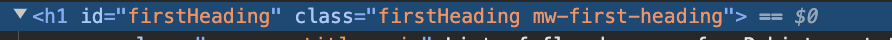

In [30]:
soup.select_one("#firstHeading").text

'List of flag bearers for Pakistan at the Olympics'

### Fetch tables from website

Now, let's try to fetch table data from Wikipedia's website

In [40]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Example URL containing the table
url = "https://en.wikipedia.org/wiki/Taxation_in_Pakistan"

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find the specific table (inspect the page to ensure correct selection)
table = soup.find('table', {'class': 'wikitable'})

# Extract headers
headers = []
for th in table.find_all('th'):
    headers.append(th.text.strip())
    
# Extract rows
rows = []
for tr in table.find_all('tr'):
    cells = tr.find_all('td')
    if len(cells) > 0:
        row = [cell.text.strip() for cell in cells]
        rows.append(row)

# Create DataFrame
df = pd.DataFrame(rows, columns=headers)

# Display the DataFrame
df

,Fiscal Year,Tax Collected\n(In Trillion Rs)
0,2003-2004,520.8
1,2004-2005,590.4
2,2005-2006,713.5
3,2006-2007,847.2
4,2007-2008,1008.1
5,2008-2009,1161.2
6,2009-2010,1327.4
7,2010-2011,1558
8,2011-2012,1882.7
9,2012-2013,1946.4


### Fetch Image from website

What about images? Yeah we can extract them too. Let's work on that!

In [70]:
import requests
from PIL import Image
from io import BytesIO
from bs4 import BeautifulSoup

# URL of the Wikipedia page containing the image
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/3/32/Flag_of_Pakistan.svg/220px-Flag_of_Pakistan.svg.png"
img = Image.open(BytesIO(image_response.content))

# Save the image
# img.save("pakistan_flag.png")

# Display the image
img.show()

#### Class Activity

Instructions:

- GET HTML Data from https://www.sbp.org.pk/l_frame/index2.asp using requests library
- Parse it using BeautifulSoup
- Find all links for PDF Documents. 
  - Hint: href.endswith('.pdf')
- Do any processing IF required to make them proper links
  - Hint: Should start with http
  - Hint: Base URL Should be https://www.sbp.org.pk/l_frame/index2.asp/........
- Print ALL PDF Documents Links